# Лабораторная работа 6
## Задание 1

In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from numpy import arccos, dot, pi, cross

In [2]:
R = 10 #Радиус большого круга
inten_i = 0.2 #Интенсивность пуассоновского процесса для интерферирующих устройств
power = 1 #Мощность антенны
inten_b = 0.3 #Интенсивность пуассоновского процесса для блокаторов
circle_r = 0.3 #Радиус блокаторов
gamma = np.pi / 3 #Угол гамма
angle_dist = 1 #Длина лучей угла
circle_area = np.pi * R**2 #Площадь круга
point_list = np.array

In [3]:
def G(alpha):
    return 2/(1 - np.cos(alpha / 2))

def Pr(power, radius, alpha):
    return power * G(alpha) / (4*np.pi * radius**2)

In [4]:
def dec_to_pol(x, y):
    return np.arctan2(y, x)
def pol_to_dec(ro, fi):
    x = ro * np.cos(fi)
    y = ro * np.sin(fi)
    return [x, y]

In [5]:
def plot_circle(x, y, r):
    angles = np.linspace(0, 2*np.pi, 50)
    x_cir = x + r*np.cos(angles)
    y_cir = y + r*np.sin(angles)
    plt.plot(x_cir, y_cir, 'm')

In [6]:
def poisson_process(lamb, radius):
    number_circles = np.random.poisson(lamb*circle_area)
    fi = 2*np.pi*np.random.uniform(0, 1, number_circles)
    ro = radius*np.sqrt(np.random.uniform(0, 1, number_circles))
    return pol_to_dec(ro, fi)

In [7]:
def angle_coords(x, y, angle, alpha):
    x1 = x + angle_dist * np.cos(angle)
    y1 = y + angle_dist * np.sin(angle)
    x2 = x + angle_dist * np.cos(angle + alpha)
    y2 = y + angle_dist * np.sin(angle + alpha)
    return x1, y1, x2, y2

In [8]:
def check_dist(a, b, c):
    ca = (c - a) / norm(c - a)
    ba = (b - a) / norm(b - a)
    cb = (c - b) / norm(c - b)
    ab = (a - b) / norm(a - b)
    
    if arccos(dot(ca, ba)) > 1:
        return norm(c - a)
    if arccos(dot(cb, ab)) > 1:
        return norm(c - b)
    return norm(cross(a - b, a - c)) / norm(b - a)

In [9]:
def check_intersection(circles_list, x1, y1, x2, y2):
    circle_point  = []
    point1 = []
    point2 = []
    point1.extend([x1, y1])
    point2.extend([x2, y2])
    for i in range(len(circles_list)):
        if (np.round(check_dist(point_list(point1), point_list(point2), point_list(circles_list[i])), 1) <= circle_r):
            return True

In [10]:
def check_vision(x1, y1, ang1_x1, ang1_y1, ang1_x2, ang1_y2, x2, y2, ang2_x1, ang2_y1, ang2_x2, ang2_y2):
    # Находим углы для первой точки
    fi_1 = dec_to_pol(x2-x1, y2-y1) if dec_to_pol(x2-x1, y2-y1) >= 0 else dec_to_pol(x2-x1, y2-y1) + pi*2
    
    ang1_fi_1 = dec_to_pol(ang1_x1-x1, ang1_y1-y1) if dec_to_pol(ang1_x1-x1, ang1_y1-y1) >= 0 else dec_to_pol(ang1_x1-x1, ang1_y1-y1) + pi*2
    
    ang1_fi_2 = dec_to_pol(ang1_x2-x1, ang1_y2-y1) if dec_to_pol(ang1_x2-x1, ang1_y2-y1) >= 0 else dec_to_pol(ang1_x2-x1, ang1_y2-y1) + pi*2
    
    # И для второй точки
    fi_2 = dec_to_pol(x1-x2, y1-y2) if dec_to_pol(x1-x2, y1-y2) >= 0 else dec_to_pol(x1-x2, y1-y2) + pi*2
    
    ang2_fi_1 = dec_to_pol(ang2_x1-x2, ang2_y1-y2) if dec_to_pol(ang2_x1-x2, ang2_y1-y2) >= 0 else dec_to_pol(ang2_x1-x2, ang2_y2-y2) + pi*2
    
    ang2_fi_2 = dec_to_pol(ang2_x2-x2, ang2_y2-y2) if dec_to_pol(ang2_x2-x2, ang2_y2-y2) >= 0 else dec_to_pol(ang2_x2-x2, ang2_y2-y2) + pi*2
    
    if (fi_1 > ang1_fi_1 and fi_1 < ang1_fi_2) and (fi_2 > ang2_fi_1 and fi_2 < ang2_fi_2):
        return True
    else:
        return False

In [11]:
def check_main_vision(x1, y1, ang1_x1, ang1_y1, ang1_x2, ang1_y2, x2, y2):
    fi_1 = dec_to_pol(x2-x1, y2-y1) if dec_to_pol(x2-x1, y2-y1) >= 0 else dec_to_pol(x2-x1, y2-y1) + pi*2
    
    ang1_fi_1 = dec_to_pol(ang1_x1-x1, ang1_y1-y1) if dec_to_pol(ang1_x1-x1, ang1_y1-y1) >= 0 else dec_to_pol(ang1_x1-x1, ang1_y1-y1) + pi*2
    
    ang1_fi_2 = dec_to_pol(ang1_x2-x1, ang1_y2-y1) if dec_to_pol(ang1_x2-x1, ang1_y2-y1) >= 0 else dec_to_pol(ang1_x2-x1, ang1_y2-y1) + pi*2
    
    if (fi_1 > ang1_fi_1 and fi_1 < ang1_fi_2):
        return True
    else:
        return False

In [12]:
x_i, y_i = poisson_process(inten_i, R)
x_b, y_b = poisson_process(inten_b, R)
angle_x1 = []
angle_y1 = []
angle_x2 = []
angle_y2 = []
for i in range(len(x_i)):
    x1, y1, x2, y2 = angle_coords(x_i[i], y_i[i], np.random.uniform(0, 2*np.pi), gamma)
    angle_x1.append(x1)
    angle_y1.append(y1)
    angle_x2.append(x2)
    angle_y2.append(y2)

In [13]:
block_list = []
for i in range(len(x_b)):
    block_list.append([x_b[i], y_b[i]])

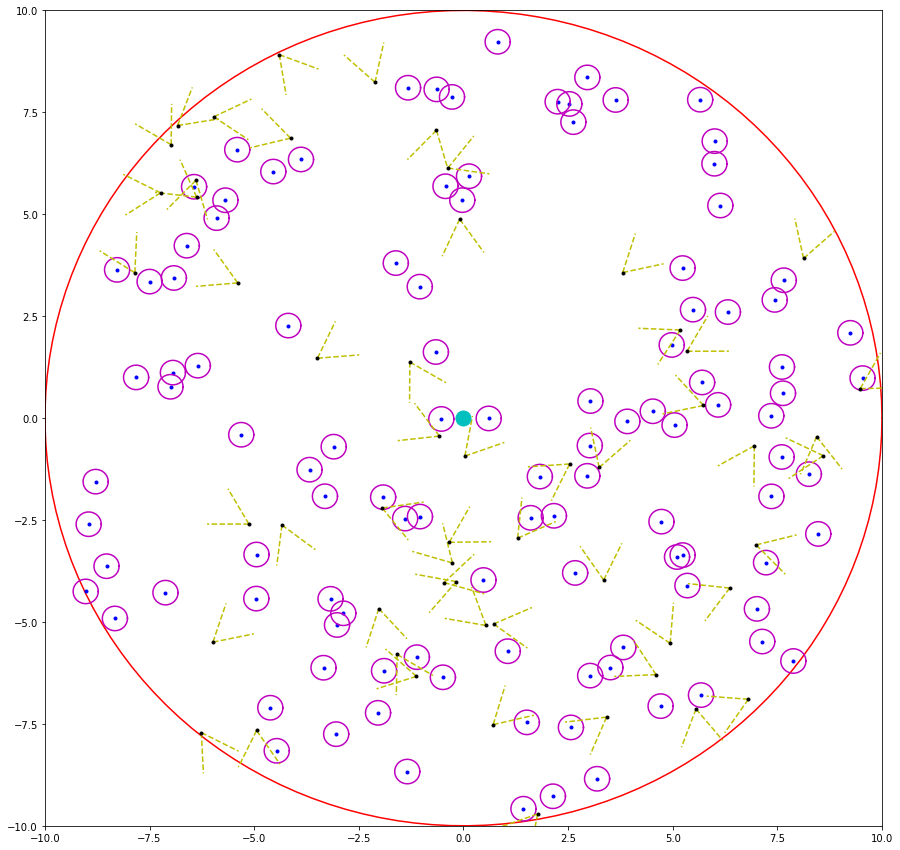

In [14]:
# Построение по точкам
plt.figure(figsize=(15, 15))

circle_ang = np.linspace(0, 2 * np.pi, 150) 
circle_x = R * np.cos(circle_ang)
circle_y = R * np.sin(circle_ang)
plt.plot(circle_x, circle_y, 'r')

plt.plot(x_b, y_b, ".b")
for i in range(len(x_b)):
    plot_circle(x_b[i], y_b[i], circle_r)

for i in range(len(x_i)):
    plt.plot([x_i[i], angle_x1[i]], [y_i[i], angle_y1[i]], "--y")
    plt.plot([x_i[i], angle_x2[i]], [y_i[i], angle_y2[i]], "--y")
plt.plot(x_i, y_i, '.k')

plt.plot(0, 0, '.c', markersize=30)
plt.xlim(-R, R)
plt.ylim(-R, R)
plt.show()

In [15]:
count_b = 0
for i in range(len(x_i)):
    if check_intersection(block_list, x_i[i], y_i[i], 0, 0):
        count_b += 1
print(f"{count_b} of {len(x_i)} is blocked")

44 of 55 is blocked


In [16]:
count_v = 0
for i in range(len(x_i)):
    if check_main_vision(x_i[i], y_i[i], angle_x1[i], angle_y1[i], angle_x2[i], angle_y2[i], float(0), float(0)):
        count_v += 1
print(f"{count_v} of {len(x_i)} can see antenna")

10 of 55 can see antenna


In [17]:
count_bv = 0
count_v = 0
for i in range(len(x_i)):
    if not check_intersection(block_list, x_i[i], y_i[i], 0, 0) and check_main_vision(x_i[i], y_i[i], angle_x1[i], angle_y1[i], angle_x2[i], angle_y2[i], float(0), float(0)):
        count_bv += 1
print(f"{count_bv} of {len(x_i)} can see antenna and not blocked")

2 of 55 can see antenna and not blocked


In [18]:
gamma_list = np.linspace(np.pi/24+.01, np.pi/2-.01, 10)
inten_i_list = np.linspace(.1, .6, 10)
inten_b_list = np.linspace(.1, .6, 10)

In [19]:
R = 10 #Радиус большого круга
inten_i = 0.2 #Интенсивность пуассоновского процесса для интерферирующих устройств
power = 1 #Мощность антенны
inten_b = 0.3 #Интенсивность пуассоновского процесса для блокаторов
circle_r = 0.3 #Радиус блокаторов
gamma = np.pi / 3 #Угол гамма
angle_dist = 1 #Длина лучей угла
circle_area = np.pi * R**2 #Площадь круга

N = 100 # Даже 100 реализаций выполняется нереально долго...
I_mean_i_list = []
count_i_mean_list = []

for inten_i in inten_i_list:
    I_list = []
    count_list = []
    for _ in range(N):
        x_i, y_i = poisson_process(inten_i, R)
        x_b, y_b = poisson_process(inten_b, R)
        angle_x1 = []
        angle_y1 = []
        angle_x2 = []
        angle_y2 = []
        for i in range(len(x_i)):
            x1, y1, x2, y2 = angle_coords(x_i[i], y_i[i], np.random.uniform(0, 2*np.pi), gamma)
            angle_x1.append(x1)
            angle_y1.append(y1)
            angle_x2.append(x2)
            angle_y2.append(y2)
        block_list = []
        for i in range(len(x_b)):
            block_list.append([x_b[i], y_b[i]])
        
        I = 0
        count = 0
        for i in range(len(x_i)):
            if not check_intersection(block_list, x_i[i], y_i[i], 0, 0) and check_main_vision(x_i[i], y_i[i], angle_x1[i], angle_y1[i], angle_x2[i], angle_y2[i], float(0), float(0)):
                count += 1
                dist = np.sqrt(x_i[i]**2 + y_i[i]**2)
                I += Pr(power, dist, gamma)
        I_list.append(I)
        count_list.append(count)
    I_mean_i_list.append(np.mean(I_list))
    count_i_mean_list.append(np.mean(count_list))

Text(0, 0.5, 'I mean')

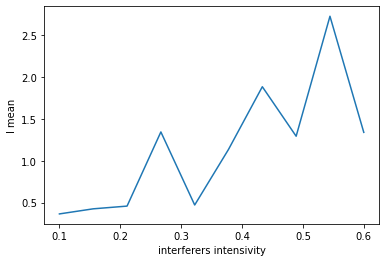

In [20]:
plt.plot(inten_i_list, I_mean_i_list)
plt.xlabel("interferers intensivity")
plt.ylabel("I mean")

In [27]:
R = 10 #Радиус большого круга
inten_i = 0.2 #Интенсивность пуассоновского процесса для интерферирующих устройств
power = 1 #Мощность антенны
inten_b = 0.3 #Интенсивность пуассоновского процесса для блокаторов
circle_r = 0.3 #Радиус блокаторов
gamma = np.pi / 3 #Угол гамма
angle_dist = 1 #Длина лучей угла
circle_area = np.pi * R**2 #Площадь круга

N = 100 # Даже 100 реализаций выполняется нереально долго...
I_mean_g_list = []
count_g_mean_list = []

for gamma in gamma_list:
    I_list = []
    for _ in range(N):
        x_i, y_i = poisson_process(inten_i, R)
        x_b, y_b = poisson_process(inten_b, R)
        angle_x1 = []
        angle_y1 = []
        angle_x2 = []
        angle_y2 = []
        for i in range(len(x_i)):
            x1, y1, x2, y2 = angle_coords(x_i[i], y_i[i], np.random.uniform(0, 2*np.pi), gamma)
            angle_x1.append(x1)
            angle_y1.append(y1)
            angle_x2.append(x2)
            angle_y2.append(y2)
        block_list = []
        for i in range(len(x_b)):
            block_list.append([x_b[i], y_b[i]])
        
        I = 0
        count = 0
        for i in range(len(x_i)):
            if not check_intersection(block_list, x_i[i], y_i[i], 0, 0) and check_main_vision(x_i[i], y_i[i], angle_x1[i], angle_y1[i], angle_x2[i], angle_y2[i], float(0), float(0)):
                dist = np.sqrt(x_i[i]**2 + y_i[i]**2)
                I += Pr(power, dist, gamma)
        I_list.append(I)
    I_mean_g_list.append(np.mean(I_list))

Text(0, 0.5, 'I mean')

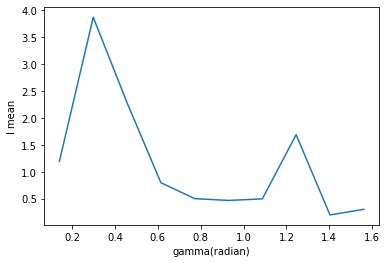

In [28]:
plt.plot(gamma_list, I_mean_g_list)
plt.xlabel("gamma(radian)")
plt.ylabel("I mean")

In [23]:
R = 10 #Радиус большого круга
inten_i = 0.2 #Интенсивность пуассоновского процесса для интерферирующих устройств
power = 1 #Мощность антенны
inten_b = 0.3 #Интенсивность пуассоновского процесса для блокаторов
circle_r = 0.3 #Радиус блокаторов
gamma = np.pi / 3 #Угол гамма
angle_dist = 1 #Длина лучей угла
circle_area = np.pi * R**2 #Площадь круга

N = 100 # Даже 100 реализаций выполняется нереально долго...
I_mean_b_list = []
count_b_mean_list = []

for gamma in gamma_list:
    I_list = []
    count_list = []
    for _ in range(N):
        x_i, y_i = poisson_process(inten_i, R)
        x_b, y_b = poisson_process(inten_b, R)
        angle_x1 = []
        angle_y1 = []
        angle_x2 = []
        angle_y2 = []
        for i in range(len(x_i)):
            x1, y1, x2, y2 = angle_coords(x_i[i], y_i[i], np.random.uniform(0, 2*np.pi), gamma)
            angle_x1.append(x1)
            angle_y1.append(y1)
            angle_x2.append(x2)
            angle_y2.append(y2)
        block_list = []
        for i in range(len(x_b)):
            block_list.append([x_b[i], y_b[i]])
        
        I = 0
        count = 0
        for i in range(len(x_i)):
            if not check_intersection(block_list, x_i[i], y_i[i], 0, 0) and check_main_vision(x_i[i], y_i[i], angle_x1[i], angle_y1[i], angle_x2[i], angle_y2[i], float(0), float(0)):
                count += 1
                dist = np.sqrt(x_i[i]**2 + y_i[i]**2)
                I += Pr(power, R, gamma)
        I_list.append(I)
        count_list.append(count)
    I_mean_b_list.append(np.mean(I_list))
    count_b_mean_list.append(np.mean(count_list))

Text(0, 0.5, 'I mean')

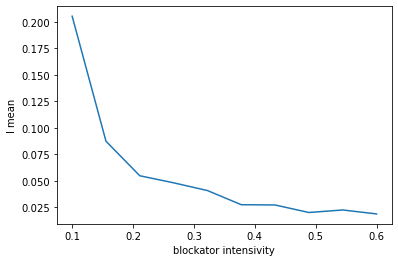

In [24]:
plt.plot(inten_b_list, I_mean_b_list)
plt.xlabel("blockator intensivity")
plt.ylabel("I mean")